<a href="https://colab.research.google.com/github/brunojlf-dev/analise-vendas-clientes-produtos/blob/main/Pandas_Data_Cleaning_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Lê os arquivos CSV de clientes, produtos e vendas e exibe as primeiras linhas de cada dataframe


url_clientes = "https://raw.githubusercontent.com/brunojlf-dev/analise-vendas-clientes-produtos/main/clientes.csv"
clientes = pd.read_csv(url_clientes)

url_produtos = "https://raw.githubusercontent.com/brunojlf-dev/analise-vendas-clientes-produtos/main/produtos.csv"
produtos = pd.read_csv(url_produtos)

url_vendas = "https://raw.githubusercontent.com/brunojlf-dev/analise-vendas-clientes-produtos/main/vendas_com_data.csv"
vendas = pd.read_csv(url_vendas)

clientes.head(), produtos.head(), vendas.head()


(   id_cliente       nome idade      cidade
 0           1  Cliente_1    24   CURITIBA 
 1           2  Cliente_2    33    SALVADOR
 2           3  Cliente_3    72   São Paulo
 3           4  Cliente_4    15   curitiba 
 4           5  Cliente_5   150   São Paulo,
    id_produto nome_produto   categoria preco_unitario
 0           1    Produto_1      CAR-NE         187.43
 1           2    Produto_2    padaria          154.41
 2           3    Produto_3      carnes          87.53
 3           4    Produto_4  MERCEARIA          160.08
 4           5    Produto_5    padaria            99.6,
    id_venda id_cliente id_produto quantidade           data_venda
 0         1        88          30          3  2024-10-24 00:00:00
 1         2        196         24         03  2022-10-17 00:00:00
 2         3        140         42          2  2023-03-09 00:00:00
 3         4        187         30         10  2023-04-16 00:00:00
 4         5         37         14         10  2023-09-20 00:00:00)

In [8]:
#funções limpeza

#limpar clientes
def limpar_clientes(df):

  df = df.copy()

  #converte idade em numeros e strings em "NaN"
  df['idade'] = pd.to_numeric(df['idade'], errors='coerce')

  #valida idades; idades inválidas transforma em "NaN"
  df['idade'] = df['idade'].where(
    df['idade']>=1
  )

  #permite nulo com "Int64"
  df['idade'] = df['idade'].astype('Int64')

  #padroniza cidades
  df['cidade'] = (
    df['cidade']
    .astype(str)
    .str.strip()
    .replace({"": np.nan, "nan": np.nan})
    .str.upper()
  )
  return df
#

#limpar produtos
def limpar_produtos(df):


  df = df.copy()

  #transformar preços em números
  df['preco_unitario'] = pd.to_numeric(df['preco_unitario'], errors='coerce')

  #validar números; números inválidos viram "NaN"
  df['preco_unitario'] = df['preco_unitario'].where(
  df['preco_unitario']>=0.01
  )

  #transforma em um número flutuante
  df['preco_unitario'] = df['preco_unitario'].astype(float)

  #padroniza categoria
  df['categoria'] = (
      df['categoria']
      .astype(str)
      .str.upper()
      .str.strip()
      .replace({"": np.nan, "nan": np.nan})
  )

  #exclui valores inválidos ou '= 0'
  df = df[
      df['preco_unitario'].notna()
  ]

  #exclui duplicados
  df = df.drop_duplicates()

  #reinicia o indice
  df = df.reset_index(drop=True)
  return df
#

#limpar vendas
def limpar_vendas(df):

  df = df.copy()

  df['id_produto'] = pd.to_numeric(df['id_produto'], errors='coerce')

  df['id_cliente'] = pd.to_numeric(df['id_cliente'], errors='coerce')

  df['data_venda'] = (
   df['data_venda']
   .astype(str)
   .str.strip()
   .pipe(pd.to_datetime, errors='coerce')
  )
  df['quantidade'] = pd.to_numeric(df['quantidade'], errors='coerce')

  df['id_cliente'] = df['id_cliente'].where(
      df['id_cliente']>=1
  )

  df['id_produto'] = df['id_produto'].where(
      df['id_produto']>=1
  )

  df['quantidade'] = df['quantidade'].where(
    (df['quantidade']>=1) &
    (df['quantidade']<=1000)
  )

  df['id_produto'] = df['id_produto'].astype('Int64')
  df['id_cliente'] = df['id_cliente'].astype('Int64')
  df['quantidade'] = df['quantidade'].astype('Int64')

  df = df[
      df['id_cliente'].notna() &
      df['data_venda'].notna() &
      df['id_produto'].notna() &
      df['quantidade'].notna()
  ]

  df = df.drop_duplicates()

  df = df.reset_index(drop=True)

  return df
#

In [9]:
clientes_tratados = limpar_clientes(clientes)
produtos_tratados = limpar_produtos(produtos)
vendas_tratadas = limpar_vendas(vendas)

In [10]:
clientes.shape, clientes_tratados.shape

((205, 4), (205, 4))

In [11]:
df = vendas_tratadas.merge(
    clientes_tratados, on="id_cliente", how="left"
)
df = df.merge(
    produtos_tratados, on="id_produto", how="left"
)

df.head()

,id_venda,id_cliente,id_produto,quantidade,data_venda,nome,idade,cidade,nome_produto,categoria,preco_unitario
0,1,88,30,3,2024-10-24,Cliente_88,28,SALVADOR,Produto_30,HORTIFRUTI,99.78
1,2,196,24,3,2022-10-17,Cliente_196,<NA>,RIO DE JANEIRO,Produto_24,CARNES,146.71
2,3,140,42,2,2023-03-09,Cliente_140,47,SAO PAULO,NaN,NaN,NaN
3,4,187,30,10,2023-04-16,Cliente_187,47,RIO DE JANEIRO,Produto_30,HORTIFRUTI,99.78
4,5,37,14,10,2023-09-20,Cliente_37,48,NaN,NaN,NaN,NaN


In [12]:
df["faturamento"] = df["quantidade"] * df["preco_unitario"]
df.head()

,id_venda,id_cliente,id_produto,quantidade,data_venda,nome,idade,cidade,nome_produto,categoria,preco_unitario,faturamento
0,1,88,30,3,2024-10-24,Cliente_88,28,SALVADOR,Produto_30,HORTIFRUTI,99.78,299.34
1,2,196,24,3,2022-10-17,Cliente_196,<NA>,RIO DE JANEIRO,Produto_24,CARNES,146.71,440.13
2,3,140,42,2,2023-03-09,Cliente_140,47,SAO PAULO,NaN,NaN,NaN,<NA>
3,4,187,30,10,2023-04-16,Cliente_187,47,RIO DE JANEIRO,Produto_30,HORTIFRUTI,99.78,997.8
4,5,37,14,10,2023-09-20,Cliente_37,48,NaN,NaN,NaN,NaN,<NA>


In [13]:
df['categoria'].unique()

array(['HORTIFRUTI', 'CARNES', nan, 'PADARIA', 'MERCEARIA', 'CARNE',
       'HORTI FRUTI', 'BEBIDAS', 'CAR-NE', 'HORTI-FRUTI'], dtype=object)

In [14]:
df['categoria'] = (
    df['categoria']
    .str.upper()
    .str.replace(r'[^A-Z]', '', regex=True)
)
df['categoria'].unique()
#

array(['HORTIFRUTI', 'CARNES', nan, 'PADARIA', 'MERCEARIA', 'CARNE',
       'BEBIDAS'], dtype=object)

In [15]:
mapa_final = {
    'HORTIFRUTI': 'HORTIFRUTI',
    'CARNE': 'CARNES',
    'CARNES': 'CARNES',
    'PADARIA': 'PADARIA',
    'MERCEARIA': 'MERCEARIA',
    'BEBIDAS': 'BEBIDAS'
}

df['categoria'] = df['categoria'].replace(mapa_final)

categorias_validas = set(mapa_final.values())
df = df[df['categoria'].isin(categorias_validas) | df['categoria'].isna()]
df['categoria'].unique()
#

array(['HORTIFRUTI', 'CARNES', nan, 'PADARIA', 'MERCEARIA', 'BEBIDAS'],
      dtype=object)

In [16]:
fat_cat = df.groupby("categoria")["faturamento"].sum().sort_values(ascending=False)
fat_cat

,faturamento
categoria,
CARNES,79579.39
HORTIFRUTI,60855.56
MERCEARIA,53279.65
BEBIDAS,46907.99
PADARIA,38739.53


In [17]:
top_clientes = df.groupby("nome")["faturamento"].sum().nlargest(10).sort_values(ascending=False)
top_clientes

,faturamento
nome,
Cliente_93,10982.12
Cliente_166,8087.68
Cliente_156,5745.45
Cliente_57,5659.38
Cliente_73,5175.0
Cliente_8,5038.18
Cliente_169,4730.3
Cliente_77,4643.96
Cliente_45,4048.39


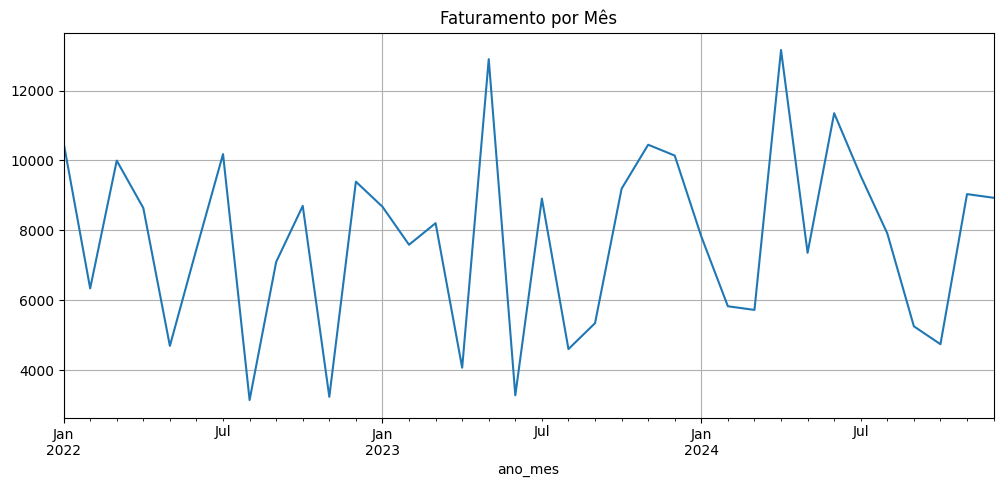

In [18]:
df["ano_mes"] = df["data_venda"].dt.to_period("M")
fat_mensal = df.groupby("ano_mes")["faturamento"].sum()
fat_mensal.plot(kind="line", figsize=(12,5))
plt.title("Faturamento por Mês")
plt.grid(True)